# Data Collection

In [1]:
import sys
sys.path.append('../')
from src.data_collection import get_data_from_wiki

In [2]:
enriched_topics = await get_data_from_wiki(limit=5, domain="programming", save_to_mongo=False)
enriched_topics[0].keys()

dict_keys(['id', 'title', 'wikidata_url', 'description', 'topic_type', 'properties', 'url', 'summary', 'categories', 'content', 'sections', 'domain'])

# Embed and Store

In [3]:
from src.embeddings import generate_embedding as embed_text

for topic in enriched_topics:
    topic["embedding"] = embed_text(topic["content"])

enriched_topics

[{'id': 'Q165436',
  'title': 'assembly language',
  'wikidata_url': 'http://www.wikidata.org/entity/Q165436',
  'description': "any low-level programming language in which there is a very strong correspondence between the instructions in the language and the architecture's machine code instructions",
  'topic_type': 'programming_language',
  'properties': {'subclass of': [{'label': 'low-level programming language',
     'url': 'http://www.wikidata.org/entity/Q558937',
     'id': 'Q558937'},
    {'label': 'non-structured programming language',
     'url': 'http://www.wikidata.org/entity/Q28922854',
     'id': 'Q28922854'}],
   'instance of': [{'label': 'programming language',
     'url': 'http://www.wikidata.org/entity/Q9143',
     'id': 'Q9143'}],
   'inception': [{'label': '1949-01-01T00:00:00Z',
     'url': '1949-01-01T00:00:00Z'}]},
  'url': 'https://en.wikipedia.org/wiki/Assembly_language',
  'summary': 'In computer programming,  assembly language (alternatively assembler language

In [4]:
from src.database.chromadb import ChromaDBClient

vector_db = ChromaDBClient()
collection = vector_db.get_or_create_collection("attempt1_programming")
collection.delete(ids=[topic["id"] for topic in enriched_topics])
for topic in enriched_topics:
    collection.add(
        documents=[topic["content"]],
        metadatas=[{"title": topic["title"], "domain": topic["domain"]}],
        ids=[topic["id"]],
        embeddings=topic["embedding"],
    )

collection.count()  # Check the number of documents in the collection

Delete of nonexisting embedding ID: Q165436
Delete of nonexisting embedding ID: Q296959
Delete of nonexisting embedding ID: Q238106
Delete of nonexisting embedding ID: Q300841
Delete of nonexisting embedding ID: Q285756
Delete of nonexisting embedding ID: Q165436
Delete of nonexisting embedding ID: Q296959
Delete of nonexisting embedding ID: Q238106
Delete of nonexisting embedding ID: Q300841
Delete of nonexisting embedding ID: Q285756


5

# Plot and Visualize using PCA

In [5]:
# PCA
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

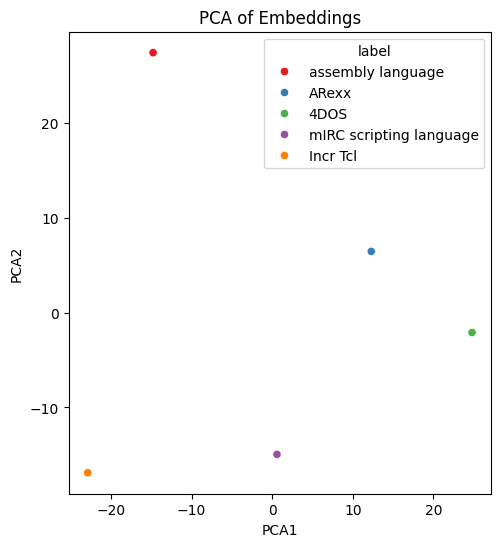

In [10]:
def plot_pca_tsne(embeddings, labels):
    # Standardize the data
    scaler = StandardScaler()
    embeddings_scaled = scaler.fit_transform(embeddings)

    # PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(embeddings_scaled)

    # t-SNE
    # tsne = TSNE(n_components=2, , n_iter=300)
    # tsne_result = tsne.fit_transform(embeddings_scaled)

    # Create a DataFrame for plotting
    df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
    # df_tsne = pd.DataFrame(tsne_result, columns=['tSNE1', 'tSNE2'])
    df_pca['label'] = labels
    # df_tsne['label'] = labels

    # Plot PCA
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='label', palette='Set1')
    plt.title('PCA of Embeddings')

    # Plot t-SNE
    # plt.subplot(1, 2, 2)
    # sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='label', palette='Set1')
    # plt.title('t-SNE of Embeddings')

    plt.show()

# Extract embeddings and labels
embeddings = np.array([topic["embedding"][0] for topic in enriched_topics])
labels = [topic["title"] for topic in enriched_topics]
# Plot PCA and t-SNE
plot_pca_tsne(embeddings, labels)